In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [151]:
path = r'/Users/gauravvattikuti/Documents/VSCode/poker_app/data/Bronze/poker-10427_2024-04-27_export.csv'

In [157]:
# cols = ['Game', 'Anudeep', 'Gaurav', 'Mythili', 'Dipak', 'Dinesh', 'Aravind', 'Deepak', 'Viswanth', 'Sumanth', 'Harsha', 'Tejaswani', 'Koustav']

df_raw = pd.read_csv(path, header = 0) #, names = cols)

df_raw.replace(0, np.nan, inplace = True)

In [159]:
schema = {'Game' : int,
'Anudeep' : float,
'Gaurav' : float,
'Mythili' : float,
'Dipak' : float,
'Dinesh' : float,
'Aravind' : float,
'Deepak' : float,
'Viswanth' : float,
'Sumanth' : float,
'Harsha' : float,
'Tejaswani' : float,
'Koustav' : float}

In [161]:
df_clean = pd.DataFrame(df, columns=schema.keys()).astype(schema)
df_clean

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'Game'

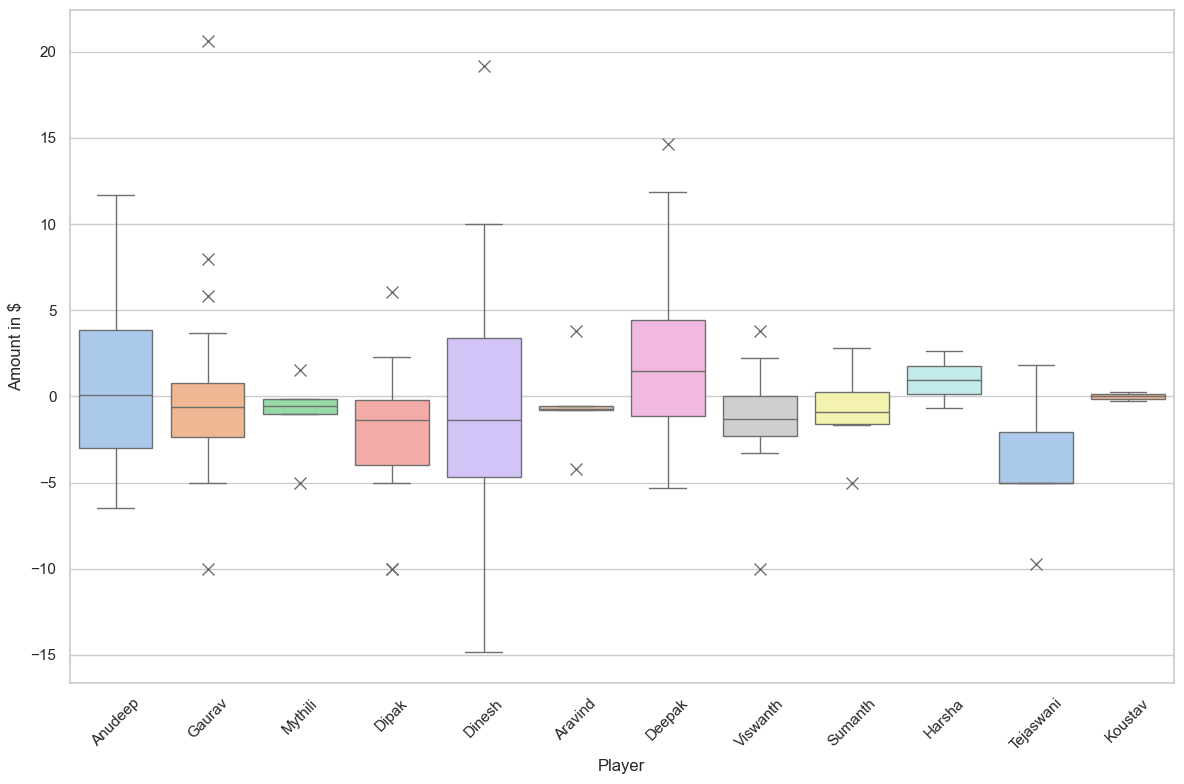

In [122]:
df_long = df.melt(id_vars=['Game'], var_name='Player', value_name='Amount')

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_long, x='Player', y='Amount', hue = 'Player', palette='pastel', flierprops=dict(marker='x', markersize=8), legend = False)

sns.set_style("whitegrid")

plt.xticks(rotation=45)
# plt.title('Game Scores by Player')
plt.ylabel('Amount in $')
# plt.xlabel('Player')
plt.tight_layout()
plt.show()

/var/folders/7j/qcm64r196nx85pphcp9979y80000gn/T/ipykernel_35779/2173991719.py:22: UserWarning: The palette list has more values (528) than needed (12), which may not be intended.
  sns.pointplot(data=df_cleaned.drop(columns='Game'), errorbar='sd', linestyle='None', markers='_', palette = colors)


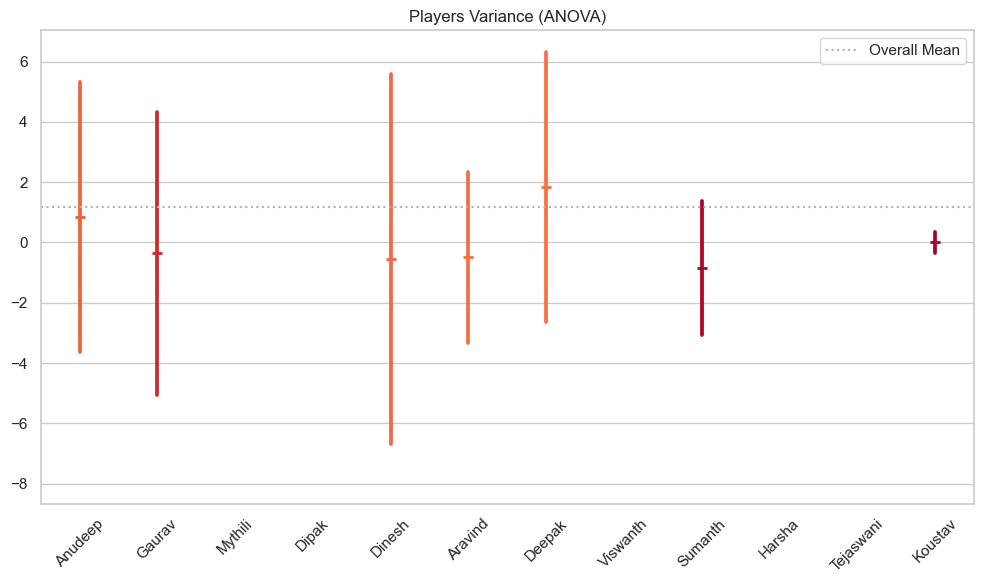

In [150]:
# Drop rows with missing values
df_cleaned = df

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*[df_cleaned[player] for player in df_cleaned.columns if player != 'Game'])


# Calculate mean of each player
player_means = df_cleaned.drop(columns='Game').mean()

# Calculate distance of each point from the mean
distances_from_mean = df_cleaned.drop(columns='Game').apply(lambda x: abs(x - player_means[x.name]), axis=0)

# Normalize distances to use as colors
norm = Normalize(vmin=distances_from_mean.min().min(), vmax=distances_from_mean.max().max())
colors = [plt.cm.RdYlGn(norm(distance)) for distance in distances_from_mean.values.flatten()]

# colors = sns.color_palette("crest", len(df_cleaned.columns) - 1)

# Plotting the ANOVA results
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_cleaned.drop(columns='Game'), errorbar='sd', linestyle='None', markers='_', palette = colors)
plt.xticks(rotation=45)
# plt.xlabel('Players')
# plt.ylabel('Scores')
plt.title('Players Variance (ANOVA)')
plt.axhline(y=df_cleaned.mean().mean(), color='.7', linestyle=':', label='Overall Mean')
plt.legend()
plt.grid(True, axis = 'y')
plt.tight_layout()
plt.show()